# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [1]:
#!pip install pandas==0.23

    100% |████████████████████████████████| 11.7MB 4.3MB/s eta 0:00:01
pyspark 2.2.1 requires py4j==0.10.4, which is not installed.
  Found existing installation: pandas 0.20.3
    Uninstalling pandas-0.20.3:
      Successfully uninstalled pandas-0.20.3
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.__version__

'0.23.4'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [3]:
movies = pd.read_csv('titles.csv.bz2', compression='bz2')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
title    244914 non-null object
year     244914 non-null int64
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [4]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [5]:
cast = pd.read_csv('cast.csv.bz2', compression='bz2')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
title        object
year         int64
name         object
type         object
character    object
n            float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [6]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [7]:
release_dates = pd.read_csv('release_dates.csv.bz2', compression='bz2', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
title      479488 non-null object
year       479488 non-null int64
country    479488 non-null object
date       479488 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [8]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [9]:
len(movies)

244914

### List all Batman movies ever made

In [10]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [11]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [12]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [15]:
#create harry potter df
potter_df = movies[movies.title.str.contains('Harry Potter', case=False)]

#Sort in descending order
potter_df.sort_values(by=['year'], ascending=False)

,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
109213,Harry Potter and the Half-Blood Prince,2009
50581,Harry Potter and the Order of the Phoenix,2007
187926,Harry Potter and the Goblet of Fire,2005
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
223087,Harry Potter and the Sorcerer's Stone,2001


### How many movies were made in the year 2017?

In [16]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [17]:
len(movies[movies.year == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [22]:
len(movies[(movies.year >= 2000) & (movies.year <= 2018)])

114070

### Section I - Q4: How many movies are titled "Hamlet"?

In [29]:
#Number of movies with the title as just 'Hamlet'
len(movies[movies.title == "Hamlet"])

#Number of movies with 'Hamlet' in the title
#len(movies[movies.title.str.contains("Hamlet", case=False)])

20

### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [33]:
#create hamlet df for movies titled only 'Hamlet' starting in 2000 to most recent
hamlet_2000_df = movies[(movies.title == "Hamlet") & (movies.year >= 2000)]

#Sort from earliest to most recent
hamlet_2000_df.sort_values(by=['year'], ascending=True)

,title,year
55639,Hamlet,2000
1931,Hamlet,2009
227953,Hamlet,2011
178290,Hamlet,2014
186137,Hamlet,2015
191940,Hamlet,2016
244747,Hamlet,2017


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [38]:
#find number of supporting cast(denoted by NaN in column 'n') in movie Inception
len(cast[(cast.title == 'Inception') & (cast.n.isnull())])

27

### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [44]:
#Find number of main cast in Inception
len(cast[(cast.title == 'Inception') &  (cast.n.notnull())])

51

### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- support cast always have an 'n' value
- remember to sort!

In [53]:
#Create df for main inception cast
inception_main_cast_df = cast[(cast.title == 'Inception') &  (cast.n.notnull())]

#display top ten main cast members
inception_main_cast_df.sort_values(by=['n'], ascending=True).iloc[:10]

,title,year,name,type,character,n
590576,Inception,2010,Leonardo DiCaprio,actor,Cobb,1.0
859993,Inception,2010,Joseph Gordon-Levitt,actor,Arthur,2.0
3387147,Inception,2010,Ellen Page,actress,Ariadne,3.0
940923,Inception,2010,Tom Hardy,actor,Eames,4.0
2406531,Inception,2010,Ken Watanabe,actor,Saito,5.0
1876301,Inception,2010,Dileep Rao,actor,Yusuf,6.0
1615709,Inception,2010,Cillian Murphy,actor,Robert Fischer,7.0
183937,Inception,2010,Tom Berenger,actor,Browning,8.0
2765969,Inception,2010,Marion Cotillard,actress,Mal,9.0
1826027,Inception,2010,Pete Postlethwaite,actor,Maurice Fischer,10.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [55]:
#All movies with character 'Albus Dumbledore'
cast[cast.character.str.contains('Albus Dumbledore', case=False)]

,title,year,name,type,character,n
704984,Epic Movie,2007,Dane Farwell,actor,Albus Dumbledore,17.0
792419,Harry Potter and the Deathly Hallows: Part 1,2010,Michael Gambon,actor,Professor Albus Dumbledore,39.0
792420,Harry Potter and the Deathly Hallows: Part 2,2011,Michael Gambon,actor,Professor Albus Dumbledore,2.0
792421,Harry Potter and the Goblet of Fire,2005,Michael Gambon,actor,Albus Dumbledore,37.0
792422,Harry Potter and the Half-Blood Prince,2009,Michael Gambon,actor,Professor Albus Dumbledore,2.0
792423,Harry Potter and the Order of the Phoenix,2007,Michael Gambon,actor,Albus Dumbledore,36.0
792424,Harry Potter and the Prisoner of Azkaban,2004,Michael Gambon,actor,Albus Dumbledore,27.0
947789,Harry Potter and the Chamber of Secrets,2002,Richard Harris,actor,Albus Dumbledore,32.0
947790,Harry Potter and the Sorcerer's Stone,2001,Richard Harris,actor,Albus Dumbledore,1.0
1685537,Ultimate Hero Project,2013,George (X) O'Connor,actor,Albus Dumbledore,NaN


In [61]:
#create df sorted by actors that played albus dumbledore
dumbledore_df = cast[cast.character.str.contains('Albus Dumbledore', case=False)]

#create a df of just actors that played albus dumbledore
dumbledore_actor_df = pd.DataFrame({'name': dumbledore_df['name'].unique()})

dumbledore_actor_df

,name
0,Dane Farwell
1,Michael Gambon
2,Richard Harris
3,George (X) O'Connor
4,Toby Regbo
5,Timothy Tedmanson


### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [68]:
#Total number of roles played by Keanu Reeves
len(cast[cast.name == 'Keanu Reeves'])

62

In [78]:
#Create df of Reeves leading roles on or after 1999
Reeves_roles_df = cast[(cast.name == 'Keanu Reeves') & (cast.n == 1.0) & (cast.year >= 1999)]

#Sort by year
Reeves_roles_df.sort_values(by=['year'], ascending=True)

,title,year,name,type,character,n
1892390,The Matrix,1999,Keanu Reeves,actor,Neo,1.0
1892397,The Replacements,2000,Keanu Reeves,actor,Shane Falco,1.0
1892358,Hard Ball,2001,Keanu Reeves,actor,Conor O'Neill,1.0
1892383,Sweet November,2001,Keanu Reeves,actor,Nelson Moss,1.0
1892348,Constantine,2005,Keanu Reeves,actor,John Constantine,1.0
1892388,The Lake House,2006,Keanu Reeves,actor,Alex Wyler,1.0
1892382,Street Kings,2008,Keanu Reeves,actor,Detective Tom Ludlow,1.0
1892385,The Day the Earth Stood Still,2008,Keanu Reeves,actor,Klaatu,1.0
1892359,Henry's Crime,2010,Keanu Reeves,actor,Henry Torne,1.0
1892342,47 Ronin,2013,Keanu Reeves,actor,Kai,1.0


In [196]:
#Keanu Reeves is listed as support in John Wick 3 despite being the titular character, possibly an error?
cast[(cast.name == 'Keanu Reeves') & (cast.n.isnull())]

,title,year,name,type,character,n
1892356,Freaked,1993,Keanu Reeves,actor,Ortiz the Dog Boy,NaN
1892357,Generation Um...,2012,Keanu Reeves,actor,John,NaN
1892363,John Wick: Chapter 3,2019,Keanu Reeves,actor,John Wick,NaN
1892381,SPF-18,2017,Keanu Reeves,actor,Keanu Reeves,NaN


In [77]:
#List lead role in matrix films
cast[(cast.title.str.contains('Matrix', case=False)) & (cast.n == 1.0) ]

,title,year,name,type,character,n
3016,Elektro Mathematrix,2016,Khaled Abdulahi,actor,Cerizz,1.0
67298,The Matrix Reloaded,2003,Ray (III) Anthony,actor,Power Station Guard,1.0
1892390,The Matrix,1999,Keanu Reeves,actor,Neo,1.0
2039601,Sex Files: Sexual Matrix,2000,Jason Schnuit,actor,Ken,1.0
2550418,The Matrix Revolutions,2003,Mary Alice,actress,The Oracle,1.0


In [79]:
#Seems Neo isn't considered the leading role in the matrix sequels
cast[(cast.title.str.contains('Matrix', case=False)) & (cast.name == 'Keanu Reeves') ]

,title,year,name,type,character,n
1892390,The Matrix,1999,Keanu Reeves,actor,Neo,1.0
1892391,The Matrix Reloaded,2003,Keanu Reeves,actor,Neo,59.0
1892392,The Matrix Revolutions,2003,Keanu Reeves,actor,Neo,33.0


In [81]:
#There doesn't seem to be any real order to 'n' column in terms of importance of cast role to the plot,
#perhaps importance is based of pay?
cast[cast.title == 'The Matrix Reloaded' ].sort_values(by=['n'], ascending=False)

,title,year,name,type,character,n
2519397,The Matrix Reloaded,2003,Anthony Zerbe,actor,Councillor Hamann,78.0
2472609,The Matrix Reloaded,2003,Anthony Brandon Wong,actor,Ghost,77.0
2460551,The Matrix Reloaded,2003,Lambert Wilson,actor,Merovingian,76.0
2432608,The Matrix Reloaded,2003,Bernard White,actor,Rama-Kandra,75.0
2429889,The Matrix Reloaded,2003,Leigh Whannell,actor,Axel,74.0
2426212,The Matrix Reloaded,2003,Cornel West,actor,Councillor West,73.0
2413433,The Matrix Reloaded,2003,Hugo Weaving,actor,Agent Smith,72.0
2408738,The Matrix Reloaded,2003,Clayton Watson,actor,Kid,71.0
2395498,The Matrix Reloaded,2003,John (II) Walton,actor,Security Bunker Guard,70.0
2348881,The Matrix Reloaded,2003,Steve Vella,actor,Malachi,69.0


In [82]:
#same issue as with Matrix Reloaded
cast[cast.title == 'The Matrix Revolutions' ].sort_values(by=['n'], ascending=False)

,title,year,name,type,character,n
2519398,The Matrix Revolutions,2003,Anthony Zerbe,actor,Councillor Hamann,47.0
2472610,The Matrix Revolutions,2003,Anthony Brandon Wong,actor,Ghost,46.0
2460552,The Matrix Revolutions,2003,Lambert Wilson,actor,Merovingian,45.0
2432609,The Matrix Revolutions,2003,Bernard White,actor,Rama-Kandra,44.0
2426213,The Matrix Revolutions,2003,Cornel West,actor,Councillor West,43.0
2413434,The Matrix Revolutions,2003,Hugo Weaving,actor,Agent Smith,42.0
2408739,The Matrix Revolutions,2003,Clayton Watson,actor,Kid,41.0
3663638,The Matrix Revolutions,2003,Gina Torres,actress,Cas,40.0
2273407,The Matrix Revolutions,2003,Che Timmins,actor,Radio Bunker Man,39.0
2219956,The Matrix Revolutions,2003,Richard Sydenham,actor,Dock Sergeant,38.0


### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [86]:
#Number or roles 1950 - 1960
len(cast[(cast.year >= 1950) & (cast.year <= 1960)])

234635

In [87]:
#number of roles 2007 - 2017
len(cast[(cast.year >= 2007) & (cast.year <= 2017)])

1452413

### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [90]:
#total number of leading roles from 2000 to present
len(cast[(cast.year >= 2000) & (cast.n == 1.0)])

60568

In [97]:
#total number of non-leading roles from 2000 to present excluding supporting roles(where 'n' column is NaN)
len(cast[(cast.year >= 2000) & (cast.n.notnull()) & (cast.n != 1.0)])

1001710

In [100]:
#total number of support roles from 2000 to present
len(cast[(cast.year >= 2000) & (cast.n.isnull())])

887484

# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [101]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
The Outsider            12
Temptation              12
Maya                    12
The Three Musketeers    11
Othello                 11
Freedom                 11
Honeymoon               11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

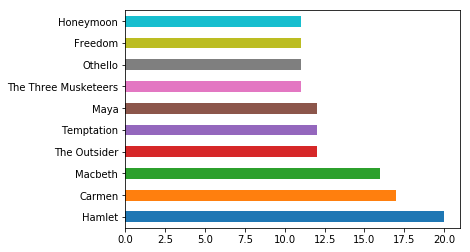

In [102]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [108]:
#create df of movies in the 2000s
movies_2000s_df= movies[movies.year >= 2000]

#dislay the top 3 years in terms of number of movies
movies_2000s_df['year'].value_counts()[:3]

2017    11474
2016     9440
2015     8702
Name: year, dtype: int64

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

In [148]:
#change year to decade
movies_per_decade = movies.year % 10
movies_per_decade = movies.year - movies_per_decade

#number of movies per decade sorted
movies_per_decade = movies_per_decade.value_counts().sort_index()

movies_per_decade

1890        3
1900       39
1910     6799
1920     9034
1930    10388
1940     8718
1950    12934
1960    17976
1970    19526
1980    21034
1990    22992
2000    39452
2010    75733
2020      285
2110        1
Name: year, dtype: int64

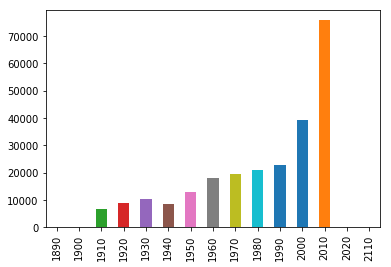

In [147]:
#plot movies per decade
movies_per_decade.plot(kind='bar')

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [161]:
#Top ten character names
cast.character.value_counts()[:10]

Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: character, dtype: int64

In [172]:
#create herself df for characeter listed as just 'Herself'
herself_df = cast[cast.character == 'Herself']

#diplay top ten
herself_df.name.value_counts()[:10]

Queen Elizabeth II           12
Mar?a Luisa (V) Mart?n        9
Luisa Horga                   9
Joyce Brothers                9
Hillary Clinton               8
Margaret Thatcher             8
Rekha                         6
Sumie Sakai                   6
Mar?a Isabel (III) Mart?n     6
Oprah Winfrey                 6
Name: name, dtype: int64

In [174]:
#create himself df for characeter listed as just 'Himself'
himself_df = cast[cast.character == 'Himself']

#diplay top ten
himself_df.name.value_counts()[:10]

Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Bill Clinton             22
Ron Jeremy               22
Franklin D. Roosevelt    21
Name: name, dtype: int64

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [181]:
#create df of roles that start with 'Zombie'
zombie_df = cast[cast.character.str.startswith('Zombie')]

#display top ten
zombie_df.character.value_counts()[:10]

Zombie                         6264
Zombie Horde                    206
Zombie - Protestor - Victim      78
Zombie Extra                     70
Zombie Dancer                    43
Zombie Girl                      36
Zombie #1                        36
Zombie #2                        31
Zombie Vampire                   25
Zombie Victim                    22
Name: character, dtype: int64

In [182]:
#create df of roles that start with 'Police'
police_df = cast[cast.character.str.startswith('Police')]

#display top ten
police_df.character.value_counts()[:10]

Policeman              7029
Police Officer         4808
Police Inspector        742
Police Sergeant         674
Police officer          539
Police                  456
Policewoman             415
Police Chief            410
Police Captain          387
Police Commissioner     337
Name: character, dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

In [190]:
#create keanu df to insepct roles
keanu_roles = cast[cast.name == 'Keanu Reeves']

#number of roles Keanu Reeves has played each year of his career sorted from start to present
keanu_roles.year.value_counts().sort_index()

1985    1
1986    3
1988    4
1989    2
1990    2
1991    3
1992    1
1993    4
1994    1
1995    2
1996    2
1997    2
1999    3
2000    3
2001    2
2003    3
2005    3
2006    2
2008    2
2009    1
2010    1
2012    1
2013    2
2014    1
2015    1
2016    5
2017    3
2018    1
2019    1
Name: year, dtype: int64

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


Text(0, 0.5, 'Number of Position')

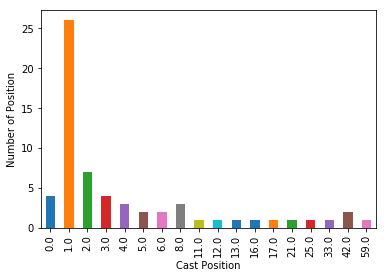

In [226]:
#change support roles(NaN) to 0 to be counted
keanu_roles_cleaned = keanu_roles.fillna(0)

#0.0 equals support roles
keanu_ax = keanu_roles_cleaned.n.value_counts().sort_index().plot(kind='bar')
keanu_ax.set_xlabel('Cast Position')
keanu_ax.set_ylabel('Number of Position')


### Section II - Q7: Plot the number of "Hamlet" films made by each decade

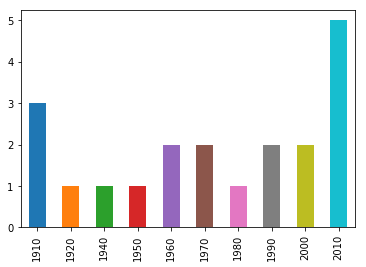

In [243]:
#create hamlet df
hamlet_decade_df = movies[movies.title == 'Hamlet']

#convert to years to decade
hamlet_decade = hamlet_decade_df.year % 10 
hamlet_decade = hamlet_decade_df.year - hamlet_decade

#plot
hamlet_decade.value_counts().sort_index().plot(kind='bar')

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [261]:
#Number of lead roles for both actor and actress btwn 1960 - 1969
total_1960s = len(cast[(cast.year >= 1960) & (cast.year <= 1969) & (cast.n == 1.0)])
actor_1960s = len(cast[(cast.year >= 1960) & (cast.year <= 1969) & (cast.n == 1.0) & (cast.type == 'actor')])
actress_1960s = len(cast[(cast.year >= 1960) & (cast.year <= 1969) & (cast.n == 1.0) & (cast.type == 'actress')])

print(f"Total lead roles: {total_1960s}, Actor lead role: {actor_1960s}, Actress lead role: {actress_1960s}")
print(f"Actor lead roles: {(actor_1960s/total_1960s) * 100:.2f}%")
print(f"Actress lead roles: {(actress_1960s/total_1960s) * 100:.2f}%")

Total lead roles: 11823, Actor lead role: 8320, Actress lead role: 3503
Actor lead roles: 70.37%
Actress lead roles: 29.63%


In [262]:
#Number of lead roles for both actor and actress btwn 2000 - 2009
total_2000s = len(cast[(cast.year >= 2000) & (cast.year <= 2009) & (cast.n == 1.0)])
actor_2000s = len(cast[(cast.year >= 2000) & (cast.year <= 2009) & (cast.n == 1.0) & (cast.type == 'actor')])
actress_2000s = len(cast[(cast.year >= 2000) & (cast.year <= 2009) & (cast.n == 1.0) & (cast.type == 'actress')])

print(f"Total lead roles: {total_2000s}, Actor lead role: {actor_2000s}, Actress lead role: {actress_2000s}")
print(f"Actor lead roles: {(actor_2000s/total_2000s) * 100:.2f}%")
print(f"Actress lead roles: {(actress_2000s/total_2000s) * 100:.2f}%")

Total lead roles: 26344, Actor lead role: 18557, Actress lead role: 7787
Actor lead roles: 70.44%
Actress lead roles: 29.56%


### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [277]:
#create frank df for movies with Frank Oz in it
frank_df = cast[cast.name == 'Frank Oz']

#group by year and count number of roles per movie per year
frank_year_group = frank_df.groupby('year')
frank_num_roles = frank_year_group.title.value_counts()

#list each of the movies where Frank Oz had more than one role
frank_num_roles.where(frank_num_roles > 1).dropna()

year  title                               
1979  The Muppet Movie                        8.0
1981  The Great Muppet Caper                  6.0
      An American Werewolf in London          2.0
1982  The Dark Crystal                        2.0
1984  The Muppets Take Manhattan              7.0
1985  Follow That Bird                        3.0
1992  The Muppet Christmas Carol              7.0
1996  Muppet Treasure Island                  4.0
1999  Muppets from Space                      4.0
      The Adventures of Elmo in Grouchland    3.0
Name: title, dtype: float64

### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [284]:
frank_df.character.value_counts().where(frank_df.character.value_counts() > 1).dropna()

Miss Piggy        6.0
Yoda              6.0
Animal            6.0
Sam the Eagle     5.0
Cookie Monster    5.0
Fozzie Bear       4.0
Bert              3.0
Grover            2.0
Name: character, dtype: float64

# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

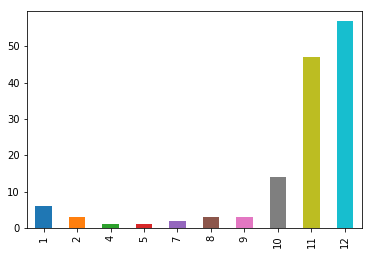

In [285]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

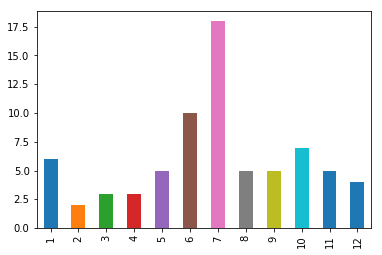

In [286]:
summer = release_dates[(release_dates.title.str.contains('Summer', case=False)) & (release_dates.country == 'USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

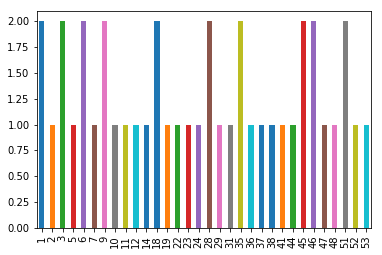

In [289]:
action = release_dates[(release_dates.title.str.contains('Action', case=False)) & (release_dates.country == 'USA')]
action.date.dt.week.value_counts().sort_index().plot(kind='bar')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [334]:
#create df for all usa release dates
usa_release = release_dates[release_dates.country=='USA']

#create df of all keanu reaves leading roles using keanu roles df
keanu_roles_leading = keanu_roles[keanu_roles.n == 1.0]

#Merge keanu roles and usa dates on title and year(to prevent merging duplicate titles such as Speed)
keanu_release_merge = keanu_roles_leading.merge(usa_release, on=['title', 'year'])

#Display keanu release dates and titles sorted  by date
keanu_usa_release = keanu_release_merge[['title','date']]
keanu_usa_release.sort_values(by=['date'])

,title,date
20,The Night Before,1988-04-15
3,Bill & Ted's Excellent Adventure,1989-02-17
2,Bill & Ted's Bogus Journey,1991-07-19
12,Little Buddha,1994-05-25
13,Speed,1994-06-10
10,Johnny Mnemonic,1995-05-26
1,A Walk in the Clouds,1995-08-11
4,Chain Reaction,1996-08-02
6,Feeling Minnesota,1996-09-13
17,The Devil's Advocate,1997-10-17


In [333]:
#all keanu leading roles total 26, after merge only 22, 4 films missing usa release date
keanu_roles_leading

,title,year,name,type,character,n
1892342,47 Ronin,2013,Keanu Reeves,actor,Kai,1.0
1892344,A Walk in the Clouds,1995,Keanu Reeves,actor,Paul Sutton,1.0
1892345,Bill & Ted's Bogus Journey,1991,Keanu Reeves,actor,Ted,1.0
1892346,Bill & Ted's Excellent Adventure,1989,Keanu Reeves,actor,Ted,1.0
1892347,Chain Reaction,1996,Keanu Reeves,actor,Eddie Kasalivich,1.0
1892348,Constantine,2005,Keanu Reeves,actor,John Constantine,1.0
1892354,Feeling Minnesota,1996,Keanu Reeves,actor,Jjaks Clayton,1.0
1892358,Hard Ball,2001,Keanu Reeves,actor,Conor O'Neill,1.0
1892359,Henry's Crime,2010,Keanu Reeves,actor,Henry Torne,1.0
1892361,John Wick,2014,Keanu Reeves,actor,John Wick,1.0


In [348]:
#Find the missing movies
missing_movies = []
keanu_total = keanu_roles_leading.title.tolist() #total keanu movies where he is listed lead
keanu_usa = keanu_usa_release.title.tolist() #keanu lead movies that had their us release date listed

#for every movie that is in total but not in usa add to missing
for total in keanu_total:
    if total not in keanu_usa:
        missing_movies.append(total)

#display missing movies
for movie in missing_movies:
    print(movie)

Henry's Crime
One Step Away
Siberia
The Whole Truth


In [349]:
#This movie's usa release date is missing
#usa_release[usa_release.title == "Henry's Crime"]
release_dates[release_dates.title == "Henry's Crime"]

,title,year,country,date
153881,Henry's Crime,2010,UK,2011-01-14
153882,Henry's Crime,2010,Belarus,2011-04-07
153883,Henry's Crime,2010,Kazakhstan,2011-04-07
153884,Henry's Crime,2010,Russia,2011-04-07
153885,Henry's Crime,2010,Ukraine,2011-04-07
153886,Henry's Crime,2010,Netherlands,2011-04-21
153887,Henry's Crime,2010,Turkey,2011-05-06
153888,Henry's Crime,2010,Armenia,2011-05-14
153889,Henry's Crime,2010,United Arab Emirates,2011-05-26
153890,Henry's Crime,2010,Malaysia,2011-06-09


In [351]:
#This movie's usa release date is also missing
release_dates[release_dates.title == "One Step Away"]

,title,year,country,date
273851,One Step Away,1985,Canada,1985-09-13
273852,One Step Away,2014,China,2014-09-19


In [ ]:
#USA release dates for missing movies found on wikipedia
#Henry' Crime: 2011-04-08
#One Step Away: NOT AVAILABLE 
#Seberia: 2018-07-13 
#The Whole Truth: 2016-10-21

### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

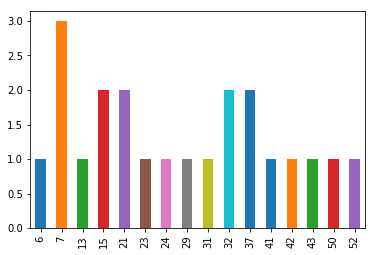

In [355]:
keanu_usa_release.date.dt.week.value_counts().sort_index().plot(kind='bar')

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?